In [36]:
import collections
import glob
import itertools
import json
import matplotlib
rc_fonts = {
    "font.size": 12,
    "font.weight": 800,
    "font.family": "serif",
    "font.serif": ["Times"], # use latex's default
    "font.sans-serif": ["DejaVu Sans"],
    "text.usetex": True,
}
matplotlib.rcParams.update(rc_fonts)
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle

import s3dexp.db
import s3dexp.db.utils as dbutils
import s3dexp.db.models as models

In [47]:
dataset = 'jpeg/flickr2500'
ext = 'jpg'
num_workers=4
hostname='cloudlet029'

df_all = pd.read_sql(
    'SELECT expname, avg_wall_ms, avg_cpu_ms, avg_mbyteps FROM EurekaExp \
        WHERE basedir LIKE %s AND num_workers=%s AND hostname=%s',
    s3dexp.db.engine,
    params=["%{}%".format(dataset), num_workers, hostname])

print df_all

                    expname  avg_wall_ms  avg_cpu_ms  avg_mbyteps
0             baseline_read     3.010344    0.353062    25.225809
1           baseline_decode     3.744661    6.492536    20.279104
2          baseline_redness     4.141470    8.386597    18.336093
3           baseline_redbus     4.502713    8.437689    16.865028
4              smart_decode     3.355996    3.232440   318.294407
5             smart_redness     3.711851    5.348107   287.779539
6              smart_redbus     4.543314    8.424938    16.714313
7       smart_decode-sorted     1.012965    2.669897  1054.522368
8      smart_redness-sorted     1.521301    4.579348   702.158710
9       smart_redbus-sorted     2.123979    4.608909   502.921454
10     baseline_read-sorted     0.738684    0.333922   102.802312
11   baseline_decode-sorted     1.826561    6.653334    41.574506
12  baseline_redness-sorted     2.381611    8.817752    31.885295
13   baseline_redbus-sorted     2.749776    8.452552    27.616202
14        

                expname  avg_wall_ms  avg_cpu_ms  avg_mbyteps
0      baseline_redness     4.141470    8.386597    18.336093
1  smart_redness-sorted     1.521301    4.579348   702.158710


<IPython.core.display.Javascript object>


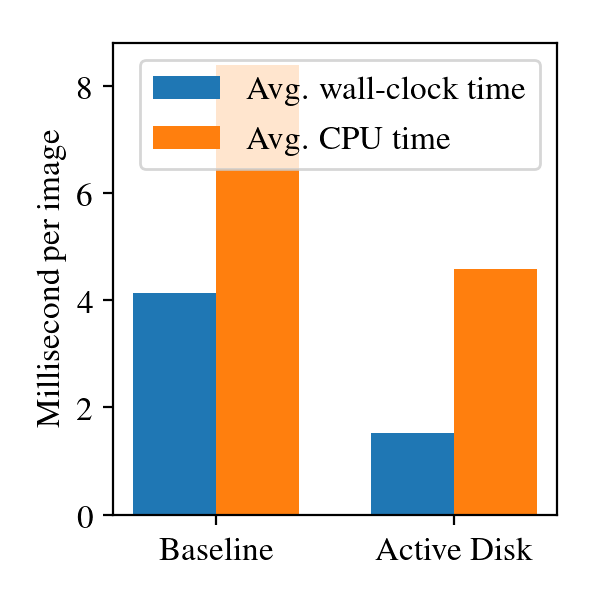

             expname  avg_wall_ms  avg_cpu_ms  avg_mbyteps
0      baseline_hash     4.061627    7.873454    18.696541
1  smart_hash-sorted     1.376971    3.987894   775.756886


<IPython.core.display.Javascript object>


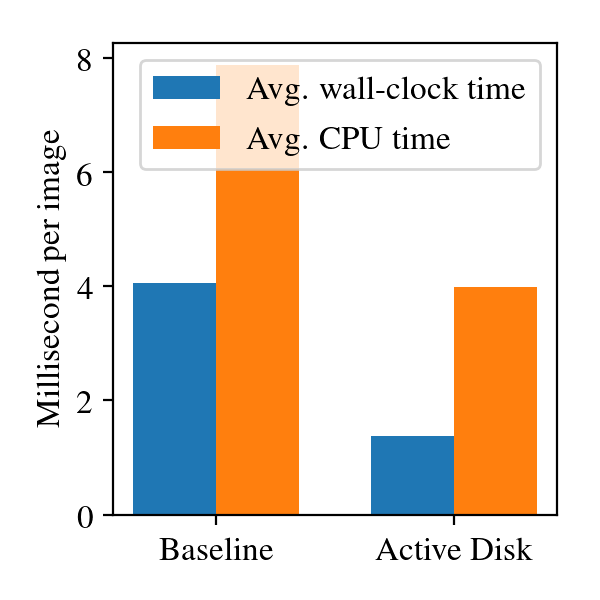

             expname  avg_wall_ms  avg_cpu_ms  avg_mbyteps
0      baseline_face   135.114178  536.962721     0.562031
1  smart_face-sorted    33.349975    3.200549     0.496726


<IPython.core.display.Javascript object>


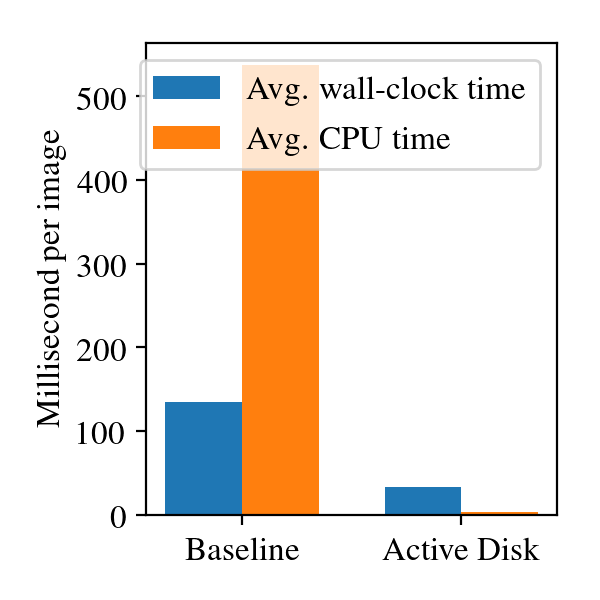

In [48]:
%matplotlib notebook

workloads = ['redness', 'hash', 'face']

for workload in workloads:             
             
    expnames = ['baseline_{}'.format(workload), 'smart_{}-sorted'.format(workload)]

    # filter and sort by expnames
    df = pd.concat([df_all[df_all['expname']==el] for el in expnames], ignore_index=True)
    print df

    x = np.arange(len(df))
    width = .35

    fig, ax = plt.subplots(figsize=(3,3))
    ax.bar(x - width/2, df['avg_wall_ms'], width, label="Avg. wall-clock time")
    ax.bar(x + width/2, df['avg_cpu_ms'], width, label="Avg. CPU time")
    ax.set_ylabel("Millisecond per image")
    # ax.set_ylim(0, 10)
    plt.xticks(x, ['Baseline', 'Active Disk'], rotation=0)
    plt.legend()
    plt.tight_layout()
    plt.savefig('micro-{}.pdf'.format(workload), bbox_inches ='tight')